# I - Definition 

## Project Overview

The project background is based on the analysis performed on potential customers or candidates in financial industry especially by investing firms and banks. Since banks are those institutions which generate most of their revenue by giving out loans hence it is very important to analyze potential customers which can contribute to generating targeted revenue in the banking industry. Since the fundamental background of customers differ from each other, hence it becomes of utmost importance to leverage machine learning to analyze financial history and background of the customers to generate meaningful and predictive insights from their data. 

Using machine learning, we can create Models that could predict or classify whether the customer will be interested in utilizing services and products offered by banks and hence efforts could be directed to engaging those customers and on the other hand predicted, less interested customers can be targeted with much better schemes or service rates that they couldn’t refuse to the offers made to them. 


## Problem Statement

The problem statement is to classify customers of a financial institution so as to find that they would be interested in signing E-loan services offered or not by a financial bank or a firm, keeping in mind the financial history of customers. To process each of the customer’s financial background manually, would not simply suffice, hence this problem requires a supervised machine learning model that can learn from the existing data and make predictions for the customers. The financial parameters such as their age, years of employment, debt etc. could be utilized as input features for the learning model. A classification supervised learning model shall be developed to classify customers to segregate them into 2 categories: those who will sign the E-loan and those who wouldn’t. The final model shall be evaluated on accuracy and f1_score majorly as evaluating metrics and will then be ready for operating upon new incoming customer’s data.


## Metrics


The model shall be evaluated on the basis of accuracy metric where 
•	Accuracy = (true positives + true negatives)/(true positives + true negatives + false positives +false negatives). 
More the evaluated accuracy, more is the success of the classification model which means that the model more accurately classifies the customers into the categories of signing or not signing the E-loan. The classification report for the model shall also generate the evaluation of precision and recall scores too. Also we shall evaluate f1 score because f1-score mathematically represents the balance between precision and recall scores as

•	F1-score = (2 * precision * recall)/(precision + recall) 

In [2]:
# importing libraries :

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from time import time

np.set_printoptions(suppress=True)

%matplotlib inline

In [3]:
# importing the dataset :

dataset = pd.read_csv(r"E:\Codes At Learning\DataScience with Python\Udacity Machine Learning Engineer Nanodegree\Capstone Project\financial_data.csv")

In [62]:
# viewing first 3 rows of the dataset

dataset.head(3)

,age,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,...,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_bi-weekly,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,total_months_employed,total_months_account
0,40,1,3135,3,1,550,36200,0.737398,0.903517,0.487712,...,0.580918,0.380918,10,1,1,0,0,0,36,30
1,61,0,3180,3,1,600,30150,0.738510,0.881027,0.713423,...,0.730720,0.630720,9,0,0,0,0,1,72,86
2,23,0,1540,0,1,450,34550,0.642993,0.766554,0.595018,...,0.531712,0.531712,7,0,0,0,0,1,6,19


# II - Analysis

In [63]:
# dataset shape :

dataset.shape

(17908, 21)

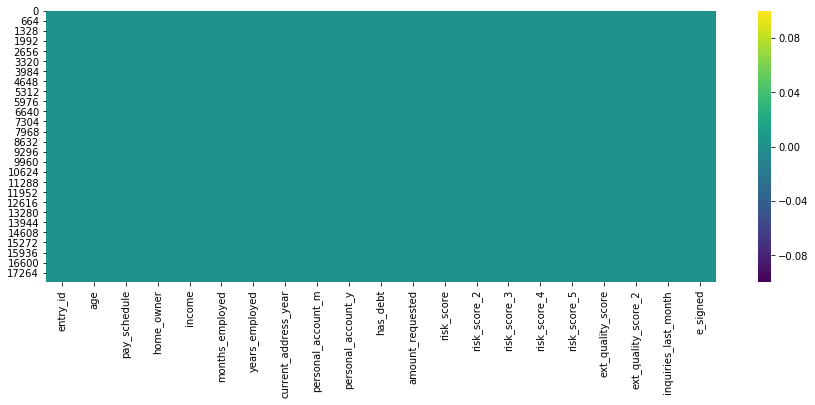

In [6]:
# viewing the null parts if any, using seaborn library :

plt.figure(figsize=(15, 5))
sns.heatmap(dataset.isnull(), cmap='viridis')

In [7]:
# No null values contained in the dataset

In [8]:
# The features entry_id is not of any importance to our analysis hence dropping this feature :

dataset = dataset.drop(columns=['entry_id'])

In [9]:
dataset['pay_schedule'].unique()

array(['bi-weekly', 'weekly', 'semi-monthly', 'monthly'], dtype=object)

In [10]:
# Encoding the 'pay_schedule' feature :

dataset = pd.get_dummies(dataset)

In [11]:
# combining 'months_employed' and 'years_employed' into one single feature :

dataset['total_months_employed'] = dataset['months_employed'] + dataset['years_employed']*12
dataset = dataset.drop(columns=['months_employed', 'years_employed'])

In [12]:
# combining 'personal_account_m' and 'personal_account_y' into one single feature :

dataset['total_months_account'] = dataset['personal_account_m'] + dataset['personal_account_y']*12
dataset = dataset.drop(columns=['personal_account_m', 'personal_account_y'])

In [13]:
# cleaned dataset as of now :

dataset.head(3)

,age,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,...,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_bi-weekly,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,total_months_employed,total_months_account
0,40,1,3135,3,1,550,36200,0.737398,0.903517,0.487712,...,0.580918,0.380918,10,1,1,0,0,0,36,30
1,61,0,3180,3,1,600,30150,0.738510,0.881027,0.713423,...,0.730720,0.630720,9,0,0,0,0,1,72,86
2,23,0,1540,0,1,450,34550,0.642993,0.766554,0.595018,...,0.531712,0.531712,7,0,0,0,0,1,6,19


The dataset is now concluded to be cleaned hence we can proceed to the analysis part with our data being analytics ready

## Data Exploration

In [14]:
# dataset statistical describing using pandas library

dataset.describe()

,age,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,...,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_bi-weekly,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,total_months_employed,total_months_account
count,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,...,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,43.015412,0.425173,3657.214653,3.584711,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,...,0.623112,0.622068,6.457226,0.538251,0.598392,0.083315,0.111905,0.206388,43.508320,45.467389
std,11.873107,0.494383,1504.890063,2.751937,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,...,0.139729,0.139898,3.673093,0.498549,0.490237,0.276365,0.315259,0.404724,26.765085,23.258829
min,18.000000,0.000000,905.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,...,0.010184,0.006622,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,0.000000,2580.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,...,0.521735,0.519677,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,29.000000
50%,42.000000,0.000000,3260.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,...,0.625944,0.622974,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,36.000000,40.000000
75%,51.000000,1.000000,4670.000000,5.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,...,0.729841,0.728940,8.000000,1.000000,1.000000,0.000000,0.000000,0.000000,60.000000,54.000000
max,96.000000,1.000000,9985.000000,12.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,...,0.970249,0.966953,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,201.000000,183.000000


## Exploratory Visualization

c:\users\shubhendra kumar\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


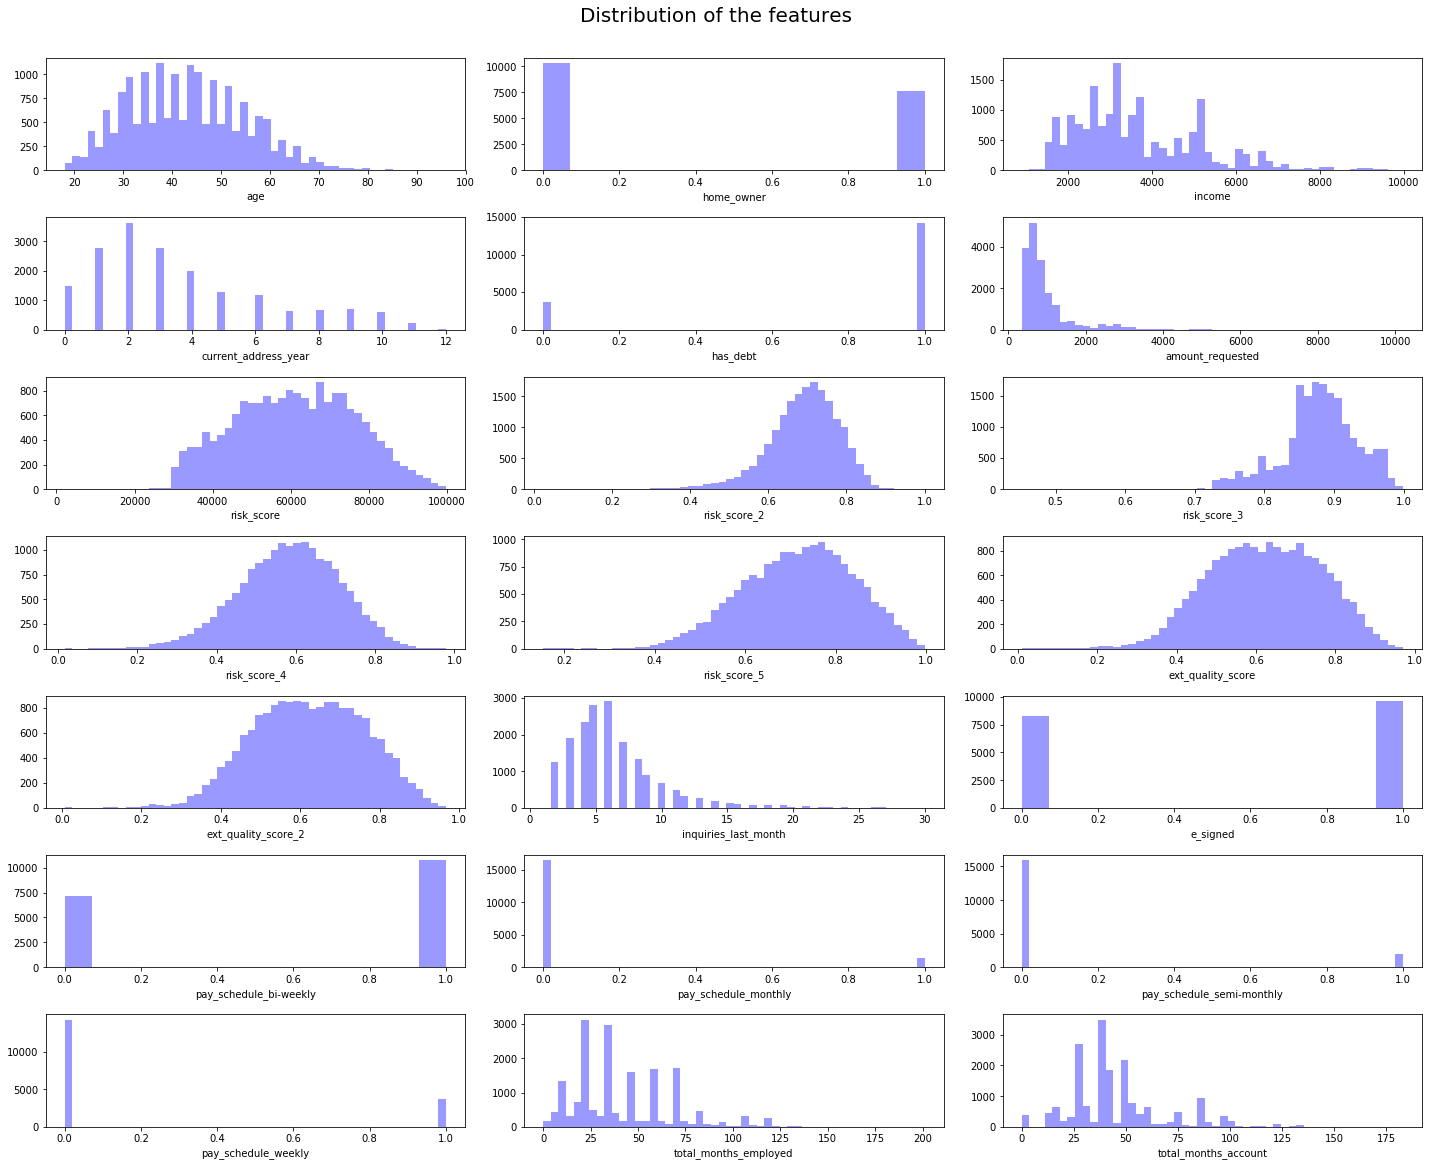

In [16]:
# Data distribution for the features :

fig = plt.figure(figsize=(20, 17))
plt.suptitle('Distribution of the features', fontsize=20)

for i in range(dataset.shape[1]):
    plt.subplot(7, 3, i+1)
    sns.distplot(dataset[dataset.columns[i]], color='blue', kde=False)
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Text(0.5, 1.0, 'CORRELATION OF THE E-SIGNED FACTOR WITH ALL OTHER')

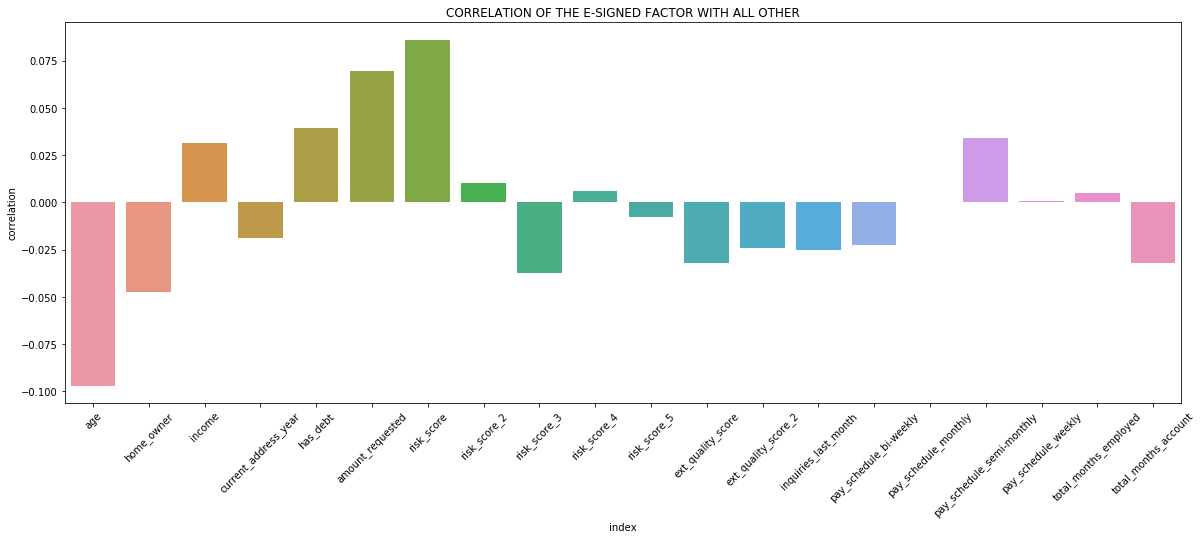

In [61]:
# Understanding correlation between other features and 'e_signed':

corr_df = pd.DataFrame(dataset.drop(columns=['e_signed']).corrwith(dataset['e_signed']), columns=['correlation']).reset_index()
plt.figure(figsize=(20, 7))
sns.barplot(x=corr_df['index'], y=corr_df['correlation'])
plt.xticks(rotation=45)
plt.title("CORRELATION OF THE E-SIGNED FACTOR WITH ALL OTHER")

#### Parameters such as 'age', 'has_debt', 'amount_requested', 'risk_score', 'home_owner' shows strong correlation with the 'e_signed' feature

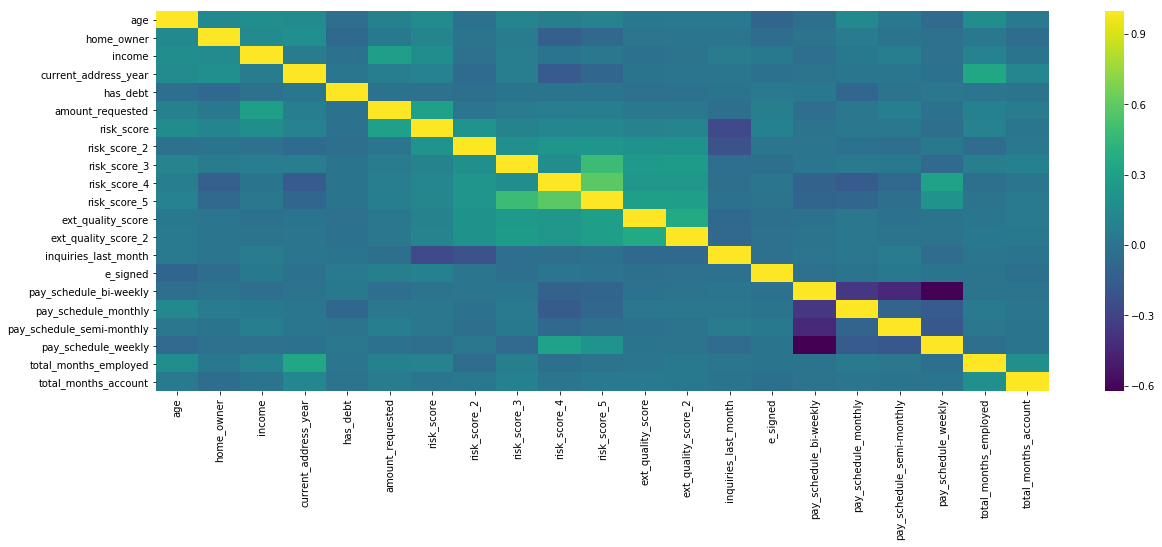

In [18]:
# visualizing a heatmap of correlation of features with each other :

plt.figure(figsize=(20, 7))
sns.heatmap(dataset.corr(), cmap='viridis')

# III - Methodology 

## Data Preprocessing

In [19]:
X = dataset.drop(columns=['e_signed']).values
y = dataset['e_signed'].values

In [20]:
# splitting the dataset into train and test :

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [21]:
# feature scaling  :

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Implementation 

In [64]:
# Logistic Regression Model :

In [22]:
# 1.) Using Logistic Regression as our first model 

from sklearn.linear_model import LogisticRegression

logisticRegressionModel = LogisticRegression()

t1_logistic_fit = time()
logisticRegressionModel.fit(X_train, y_train)
t2_logistic_fit = time()

c:\users\shubhendra kumar\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
time_taken_by_logRegModel_to_fit = t2_logistic_fit - t1_logistic_fit

In [ ]:
# The above model i.e. Logistic Regression was chosen because of its applicability in classifying into binary outputs and 
# since we have binary classification of our target predicted variable, hence we choose LogisticRegressionModel.   

In [24]:
# predicting on the test dataset from the logistic Regression model :

t1_logistic_predict = time()
y_pred_logistic = logisticRegressionModel.predict(X_test)
t2_logistic_predict = time()

In [25]:
time_taken_by_logRegModel_to_predict = t2_logistic_predict - t1_logistic_predict

In [26]:
print("Time taken by logistic regression model to fit data ", time_taken_by_logRegModel_to_fit)
print("Time taken by logistic regression model to predict ", time_taken_by_logRegModel_to_predict)

Time taken by logistic regression model to fit data  0.23372578620910645
Time taken by logistic regression model to predict  0.0020020008087158203


In [65]:
# SVM Model :

In [27]:
# 1.) Using SVM as our second model :

from sklearn.svm import SVC

svm_model = SVC()

t1_svm_fit = time()
svm_model.fit(X_train, y_train)
t2_svm_fit = time()

In [28]:
time_taken_by_svmModel_to_fit = t2_svm_fit - t1_svm_fit

In [66]:
# The above model i.e. SVM was chosen because of its applicability in classifying into binary outputs and 
# since we have data in huge quanitities and because of flexibility in hyper-tuning the hyper parameters of an SVM model, 
# this model was chosen.

In [29]:
# predicting on the test dataset from the logistic Regression model :

t1_svm_predict = time()
y_pred_svm = svm_model.predict(X_test)
t2_svm_predict = time()

In [30]:
time_taken_by_svmModel_to_predict = t2_svm_predict - t1_svm_predict

In [31]:
print("Time taken by svm model to fit data ", time_taken_by_svmModel_to_fit)
print("Time taken by svm model to predict ", time_taken_by_svmModel_to_predict)

Time taken by svm model to fit data  39.00379204750061
Time taken by svm model to predict  8.451874017715454


In [38]:
# time taken to fit data :

performance_model = {"Fit time":[time_taken_by_logRegModel_to_fit, time_taken_by_svmModel_to_fit], 
                     "Predict time":[time_taken_by_logRegModel_to_predict, time_taken_by_svmModel_to_predict]}

performance_model_df = pd.DataFrame(performance_model, index=['logistic regression', 'svm']).reset_index()
performance_model_df.rename(columns={'index':'Model'}, inplace=True)

Text(0.5, 1.0, "EACH MODEL'S LEARNING TIME")

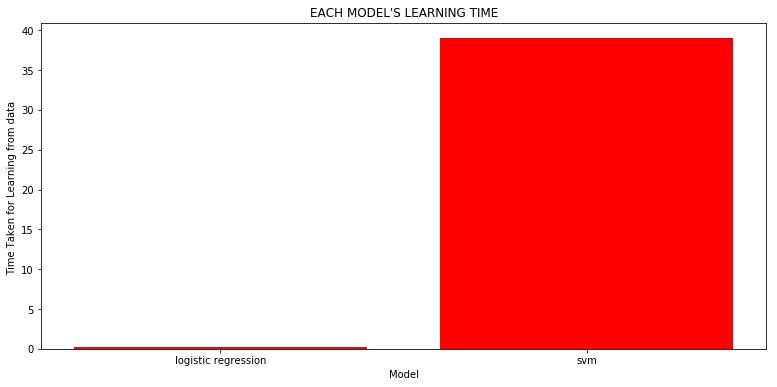

In [39]:
plt.figure(figsize=(13, 6))
plt.bar(performance_model_df['Model'], performance_model_df['Fit time'], color='red')
plt.xlabel('Model')
plt.ylabel('Time Taken for Learning from data ')
plt.title("EACH MODEL'S LEARNING TIME")

>SVM takes a lot of time to train whereas logistic regression model takes way less time to train and learn from data

Text(0.5, 1.0, "EACH MODEL'S PREDICTION TIME")

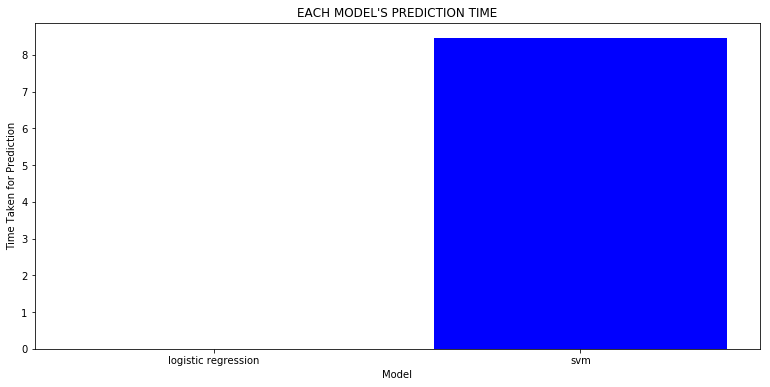

In [40]:
plt.figure(figsize=(13, 6))
plt.bar(performance_model_df['Model'], performance_model_df['Predict time'], color='blue')
plt.xlabel('Model')
plt.ylabel('Time Taken for Prediction')
plt.title("EACH MODEL'S PREDICTION TIME")

> SVM takes more time to make predictions whereas logistic regression model takes less time to make predictions.
  SVM has an accuracy of around 60.4 % whereas logistic regression model has an accuracy of around 57% on test data, hence we choose SVM model to develop the final model and perform tuning in the hyper parameters. 

## Refinement :

In [41]:
# Using k-fold cross validation to evalute model performance :

from sklearn.model_selection import cross_val_score

cross_val = cross_val_score(estimator=svm_model, X=X_train, y=y_train, scoring='accuracy', cv=10, n_jobs=-1)
cross_val

array([0.59598214, 0.60193452, 0.61830357, 0.59717051, 0.62844378,
       0.60312733, 0.60089352, 0.60685034, 0.61997019, 0.585693  ])

In [42]:
# mean accuracy :

cross_val.mean()

0.605836890763304

In [43]:
# standard deviation :

cross_val.std()

0.012215861687252848

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.01, 0.1, 1, 10], 'kernel':['linear','rbf']}

gridSearchModel = GridSearchCV(estimator=svm_model, 
                               param_grid=param_grid, 
                               scoring='accuracy',
                               cv=10,
                               n_jobs=-1)

gridSearchModel.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 10], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [45]:
# best combination :

gridSearchModel.best_params_

{'C': 1, 'kernel': 'rbf'}

In [56]:
# best possible accuracy achieved by the best parametric combination :

gridSearchModel.best_score_*100

60.58372422008785

In [47]:
# Redefining the SVM model with the new parametric combination : {'C': 1, 'kernel': 'rbf'}

svm_tuned_model = SVC(C=1, kernel='rbf')
svm_tuned_model.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [48]:
y_pred_svm_tuned = svm_tuned_model.predict(X_test)

# IV - Results

## Model Evaluation and Validation

In [49]:
# Metrics for the hyper tuned model after grid search :

print("Accuracy by SVM Tuned Model %0.3F percent" %( accuracy_score(y_test, y_pred_svm_tuned)*100))
print("Precision by SVM Tuned Model %0.3F percent" %( precision_score(y_test, y_pred_svm_tuned)*100))
print("F1-score by SVM Tuned Model %0.3F percent" %( f1_score(y_test, y_pred_svm_tuned)*100))
print("Recall by SVM Tuned Model %0.3F percent" %( recall_score(y_test, y_pred_svm_tuned)*100))

Accuracy by SVM Tuned Model 60.487 percent
Precision by SVM Tuned Model 61.609 percent
F1-score by SVM Tuned Model 65.469 percent
Recall by SVM Tuned Model 69.846 percent


In [67]:
# final tuned svm model hyper parameters :

gridSearchModel.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

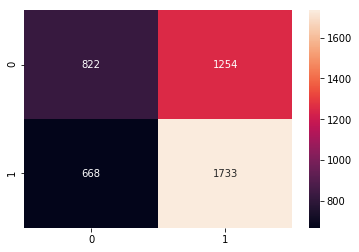

In [36]:
# Confusion matrix for logistic Regression model :

sns.heatmap(confusion_matrix(y_test, y_pred_logistic), annot=True, fmt='g')

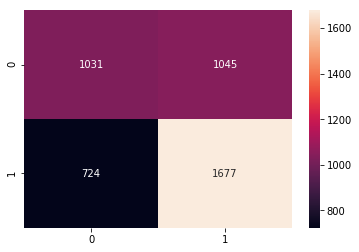

In [37]:
# Confusion matrix for SVM model :

sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='g')

In [32]:
# Evaluating the metrics of the logistic Regression model :

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.55      0.40      0.46      2076
           1       0.58      0.72      0.64      2401

   micro avg       0.57      0.57      0.57      4477
   macro avg       0.57      0.56      0.55      4477
weighted avg       0.57      0.57      0.56      4477



In [33]:
# Evaluating the metric of the SVM model :

print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.59      0.50      0.54      2076
           1       0.62      0.70      0.65      2401

   micro avg       0.60      0.60      0.60      4477
   macro avg       0.60      0.60      0.60      4477
weighted avg       0.60      0.60      0.60      4477



In [34]:
print("Accuracy by logisticRegression Model %0.3F percent" %( accuracy_score(y_test, y_pred_logistic)*100))
print("Precision by logisticRegression Model %0.3F percent" %( precision_score(y_test, y_pred_logistic)*100))
print("f1_score by logisticRegression Model %0.3F percent" %( f1_score(y_test, y_pred_logistic)*100))
print("recall_score by logisticRegression Model %0.3F percent" %( recall_score(y_test, y_pred_logistic)*100))

Accuracy by logisticRegression Model 57.069 percent
Precision by logisticRegression Model 58.018 percent
f1_score by logisticRegression Model 64.328 percent
recall_score by logisticRegression Model 72.178 percent


In [35]:
print("Accuracy by SVM model %0.3F percent" %( accuracy_score(y_test, y_pred_svm)*100))
print("Precision by SVM model %0.3F percent" %( precision_score(y_test, y_pred_svm)*100))
print("f1_score by SVM model %0.3F percent" %( f1_score(y_test, y_pred_svm)*100))
print("recall_score by SVM model %0.3F percent" %( recall_score(y_test, y_pred_svm)*100))

Accuracy by SVM model 60.487 percent
Precision by SVM model 61.609 percent
f1_score by SVM model 65.469 percent
recall_score by SVM model 69.846 percent


## Justification AND Free-Form Visualization

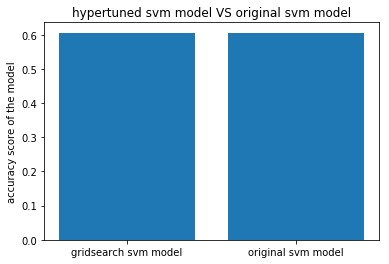

In [50]:
# plotting the accuracy of the initial svm model vs hypertuned svm model :

plt.bar(x=['gridsearch svm model', 'original svm model'], height=[gridSearchModel.best_score_, accuracy_score(y_test, svm_model.predict(X_test))])
plt.title("hypertuned svm model VS original svm model")
plt.ylabel("accuracy score of the model")
plt.show()

In [68]:
# The difference might not be visible in the above 2 bar plots but the tuned model gives 0.10 % more accuracy than the original
# svm model upon operating on the common test data for both the 2 models.

In [52]:
# difference between the logistic regression model vs the svm model :

dict_logisticRegressionModel = {"Accuracy" : [accuracy_score(y_test, logisticRegressionModel.predict(X_test))], 
                                "Precision" : [precision_score(y_test, logisticRegressionModel.predict(X_test))],
                                "Recall" : [recall_score(y_test,logisticRegressionModel.predict(X_test))],
                                 "F1-score" : [f1_score(y_test,logisticRegressionModel.predict(X_test))]}

dict_svmModel = {"Accuracy" : [accuracy_score(y_test, svm_tuned_model.predict(X_test))], 
                                "Precision" : [precision_score(y_test, svm_tuned_model.predict(X_test))],
                                "Recall" : [recall_score(y_test,svm_tuned_model.predict(X_test))],
                                 "F1-score" : [f1_score(y_test,svm_tuned_model.predict(X_test))]}

df_logistic = pd.DataFrame(dict_logisticRegressionModel).transpose()
df_svm = pd.DataFrame(dict_svmModel).transpose()

In [53]:
# Generating the evaluatingMetrics dataframe :

evaluationModels = pd.concat([df_logistic, df_svm], axis=1)
evaluationModels.columns = ["logisticRegression model", "svm model"]
evaluationModels

,logisticRegression model,svm model
Accuracy,0.570695,0.604869
Precision,0.580181,0.616091
Recall,0.721783,0.698459
F1-score,0.643281,0.654695


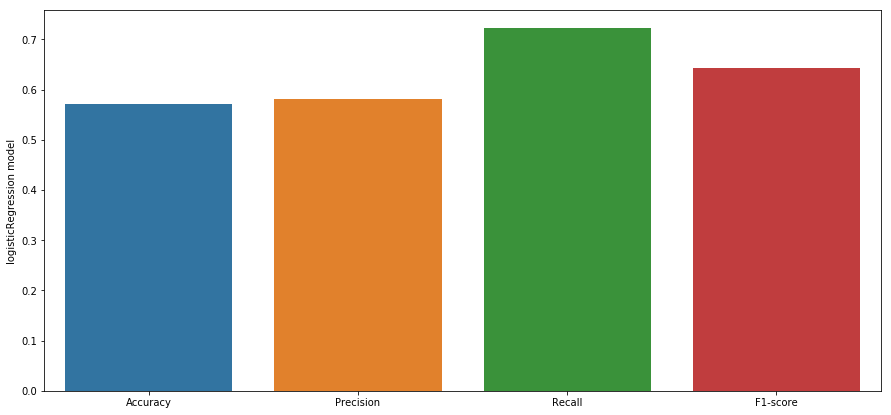

In [54]:
# logistic regression model :

plt.figure(figsize=(15, 7))
sns.barplot(data=evaluationModels, x=evaluationModels.index, y='logisticRegression model')

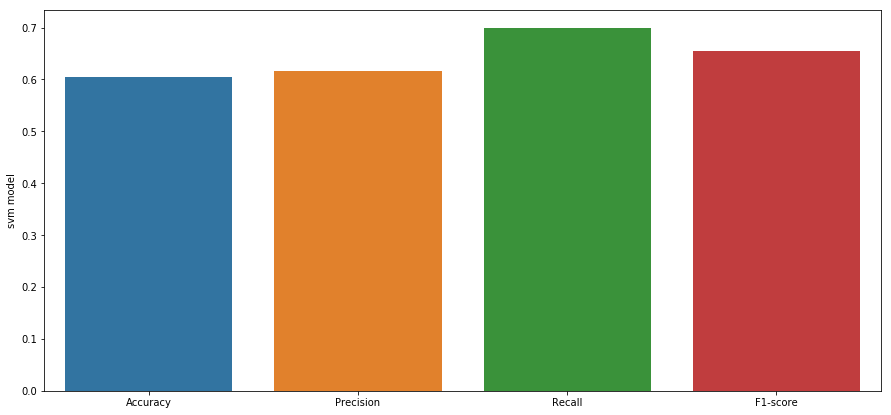

In [55]:
# SVM model :

plt.figure(figsize=(15, 7))
sns.barplot(data=evaluationModels, x=evaluationModels.index, y='svm model', )

The results of the svm model is far better than the logistic regression model which was the benchmark model. The benchmark model outperforms the svm model only for the case of Recall score which implies the number of people to whom the model predicts 1 (Will sign E-loan) but actually didn’t sign the loan are very less in the logistic regression model i.e. the number of false negatives are less as predicted in case of the benchmark model. Else for precision, f1_score and accuracy, the svm tuned model outperforms the logistic regression.
The final solution which is the hyper-parameter tuned svm model is significant enough to solve the problem of predicting the customer’s E-signing a loan based on his financial history

In [73]:
# Testing the model prediction randomly :

input_feature = [[   53.        ,     0.        ,  5735.        ,     3.        ,
           1.        ,   600.        , 45550.        ,     0.5018958 ,
           0.77895493,     0.62006953,     0.69431089,     0.756914  ,
           0.756914  ,    10.        ,     0.        ,     0.        ,
           1.        ,     0.        ,    60.        ,    54.        ]]

input_feat_scaled = scaler.transform(input_feature)  # feature scaling the input test data 

svm_tuned_model.predict(input_feat_scaled) 


'''
0 as output which means the person will not sign the E-Loan if provided with this opportunity.
Hence this customer can be targeted with much better services or schemes in special 

'''

array([0], dtype=int64)

# V - CONCLUSION

## Reflection 

The project shall start by incorporating the dataset into the IPython notebook. At the first stage, the data shall be tried for cleaning where presence of any possible outliers or Null values shall be removed or rectified. Then Exploratory analysis shall be performed which would include several statistical visualization plots to understand the data and features more clearly. This phase shall be followed by selecting appropriate features for our models and then developing two of the popular classification models i.e. logistic regression and SVM for evaluation on the test set. 
1.	As per the process, we preprocessed the data after exploratory analysis and during data preprocessing, feature scaling was performed to normalize all the statistical observations in our dataset.
2.	Two data models for classification were selected i.e. Logistic Regression and Support Vector Machine classifier. Logistic regression model is suited for binary classification hence used a benchmark model. 
3.	The data was split into training (75%) and testing (25%) dataset size. Both the models were fitted with the training dataset and the learning time for both the models was recorded. 
4.	The models were made to perform prediction on the test dataset with the prediction time being also recorded for each model.	


The interesting part about developing models was the fact that although SVM model gave more accuracy and outperformed the benchmark model in all the scoring metrics, yet it was heavy on computation for learning and predicting for data. Hence when the dataset is heavy, also other algorithms should be tried that could reduce the computation time for learning and prediction. Also logistic regression trained and predicted itself efficiently thereby reducing down the number of heavy computation.
The difficult part was performing grid search using k-fold cross validation on the training dataset for the svm model. Since it had already been noticed of the much more time and computation invested for learning and predicting, therefore grid search for the svm model, increased the computation and it took a lot of time (more than 40 minutes) to complete the grid search for all the possible combinations of the parameter list provided.
The final solution is very much optimized and is a better option for performing on new data for deducing inferences and predictions. Since the size of the dataset was hugh in our case, hence svm, even though took more time to learn and train itself, gave good results on evaluating metrics than as compared to other benchmark models.


## Improvement

+ Final improvement could be made by using ensemble learning methods in machine learning by developing a model that is itself a combination of 2 or more machine learning algorithms.

+ Using ensemble in random forest classifier might have yielded out a better model though with less training time and less prediction time as against SVM classifier model.


## *FINAL CONCLUSION*:

### *Now our model has given us the  60.60 % percent accuracy. We have an algorithm that can help predict whether or not a user will complete this e-signed step. One way to leverage this model is to target those predicted not to reach the same pace with customized onboarding. This means that when the lead arrives from our marketplace they may receive a different onboarding experience based on how likely they are to finish the general onboarding process. This can help our company minimize how many people drop off from the funnel. This is entirely about how we decide the onboarding so we can maximize how many people can reach that.  So with new onboarding screens built intentionally to lead these users to finalize the loan application. We can actually attempt to get more than 40 percent of those predicted not to finish the process to actually complete the e-sign step. We know that our model has a running 60 percent accuracy. So even if all the people who have predicted not to reach the esign step 60 percent of them have been correctly predicted on average of course,  this means that only around 36 to 40 percent of the subset of people are expected to reach the esign step into complete it. So if we can change the onboarding process so we can get more than the 36 to 40 percent number and if we can increase it then we can drastically increase profits.*
